https://www.kaggle.com/datasets/prathamtripathi/drug-classification 1 - Apply Random Forest with GridSearch 2 - Print the best parameters and score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/drug200.csv')

In [2]:
# Check the data types, dimensions, and summary statistics
print(df.dtypes)
print(df.shape)
print(df.describe())

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
(200, 6)
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
0


<AxesSubplot:>

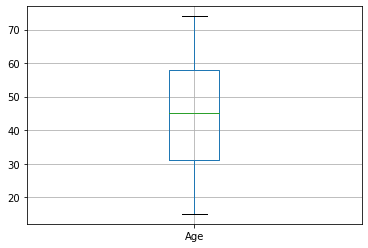

In [3]:
# Check for missing values, duplicate records, and outliers
print(df.isnull().sum())
print(df.duplicated().sum())
df.boxplot(column=['Age'])

**There is no Null Value  in the Data Set**

# EDA for this dataset

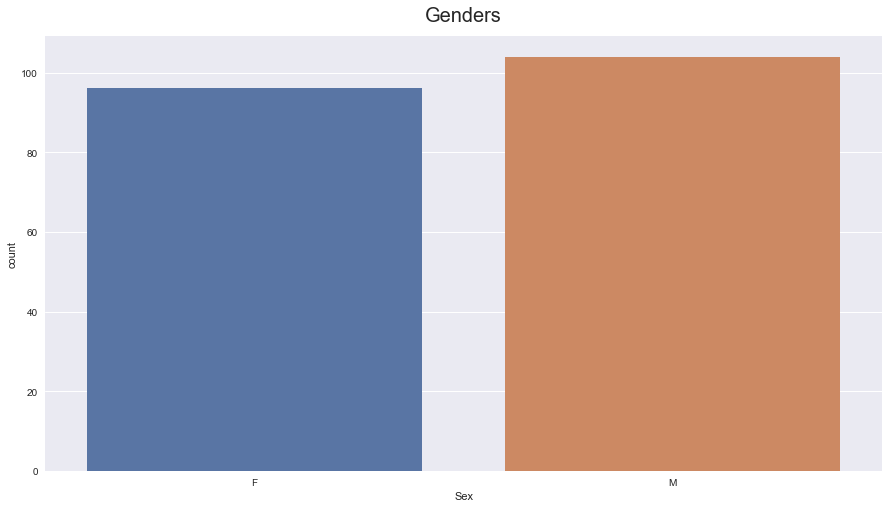

In [4]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("Genders", fontsize=20, y=1.02)
sns.countplot(x = df.Sex, palette="deep")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


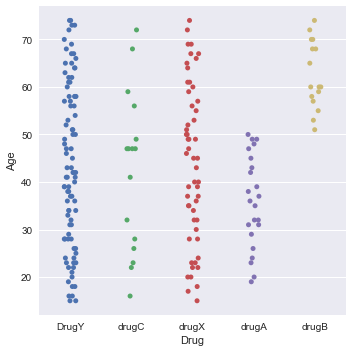

In [5]:
sns.catplot('Drug', 'Age', data = df)

**For na_to_k higher than 15, only drugY is used.
Rest drugs are used in 5 to 15 Na_to_k value range.**
- Now Checking the outliers

<AxesSubplot:xlabel='Age'>

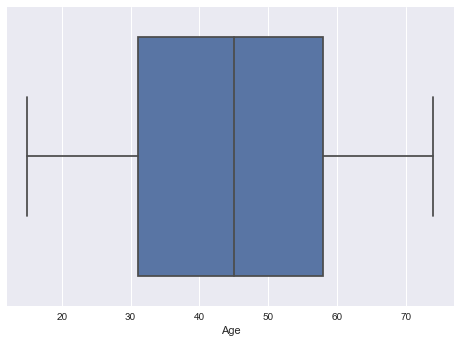

In [6]:
sns.boxplot(x=df['Age'])

In [7]:
df["Sex"] = df["Sex"].map({"M": 0, "F":1})
df["BP"] = df["BP"].map({"HIGH" : 3, "NORMAL" : 2, "LOW": 1})
df["Cholesterol"] = df["Cholesterol"].map({"HIGH": 1, "NORMAL" : 0})
df["Drug"] = df["Drug"].map({"DrugY": 0, "drugC": 1, "drugX": 2, "drugA":3, "drugB":4})

<AxesSubplot:>

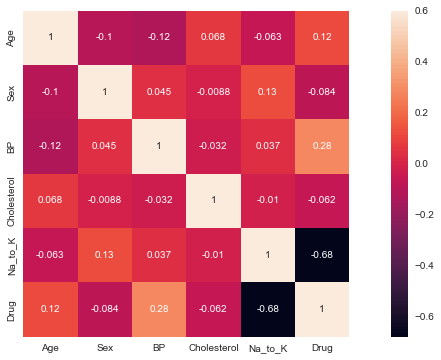

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

- BP is positively correlated with Drug type.
- Na_to_K is highly negatively correlated with drug type.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


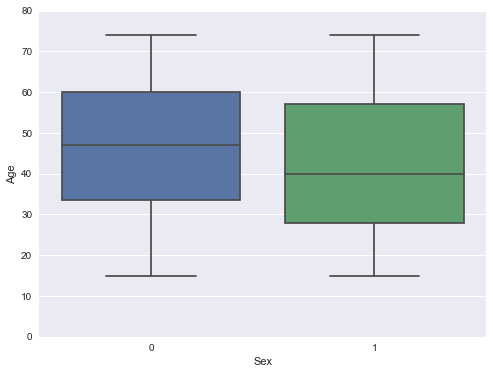

In [9]:
plt.figure(figsize = (8,6))
ax = sns.boxplot('Sex', 'Age', data = df).set(ylim = (0, 80))

**Distribution of patients age compared to gender is pretty simillar.**

# Feature Engineering
- Drop of column Sex, since in EDA we saw it didin't had any affect on target feature.

In [10]:
df=pd.read_csv('data/drug200.csv')

In [11]:
#dropping sex as it has no correlation with drugs
df.drop('Sex', axis=1, inplace=True)

**Classification Prediction**

In [12]:
X=df.drop(columns='Drug')
y=df.Drug

In [13]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name]) 

In [14]:
label_encoder=LabelEncoder()
label_encoder.fit(df.Drug)
df.Drug = label_encoder.transform(df.Drug)
classes = label_encoder.classes_

In [15]:
X=pd.get_dummies(X)
X

,Age,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,0,1,0
1,47,13.093,0,1,0,1,0
2,47,10.114,0,1,0,1,0
3,28,7.798,0,0,1,1,0
4,61,18.043,0,1,0,1,0
...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,1,0
196,16,12.006,0,1,0,1,0
197,52,9.894,0,0,1,1,0
198,23,14.020,0,0,1,0,1


In [16]:
#Data split
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
n_estimators = [64,100,128,200]
max_features = [2,3,4,5]
bootstrap = [True,False]

In [19]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier()

In [22]:
grid = GridSearchCV(rfc,param_grid)

In [23]:
X_train

,Age,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
71,28,19.675,0,0,1,1,0
90,62,16.594,0,0,1,1,0
100,31,11.871,1,0,0,0,1
44,50,12.295,0,0,1,0,1
94,56,15.015,0,1,0,1,0
...,...,...,...,...,...,...,...
58,60,10.091,0,0,1,0,1
21,63,25.917,0,0,1,1,0
49,28,19.796,0,1,0,1,0
64,60,13.303,1,0,0,1,0


In [24]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128, 200]})

In [25]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 200}

In [26]:
predictions = grid.predict(X_test)
predictions

array(['drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'DrugY', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugC',
       'drugX', 'drugX', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugA', 'DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugB', 'drugX', 'drugX', 'drugA',
       'drugC', 'drugC', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'drugX', 'drugX', 'drugC', 'drugX', 'DrugY',
       'DrugY', 'drugA', 'drugA', 'DrugY'], dtype=object)

# Performance Evaluation

In [27]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


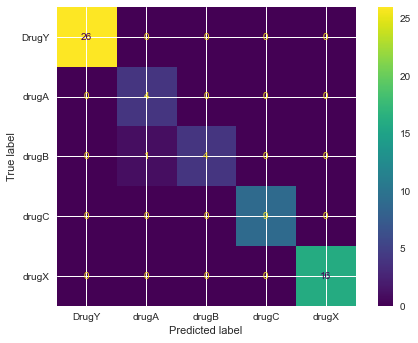

In [28]:
plot_confusion_matrix(grid,X_test,y_test)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        16

    accuracy                           0.98        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



In [30]:
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

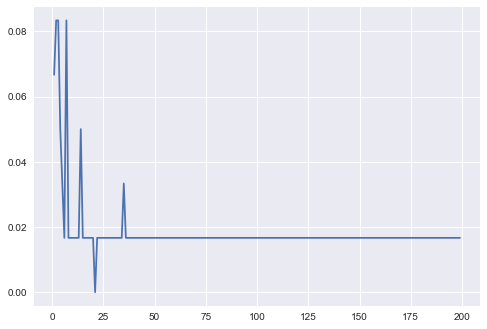

In [31]:
plt.plot(range(1,200),errors)

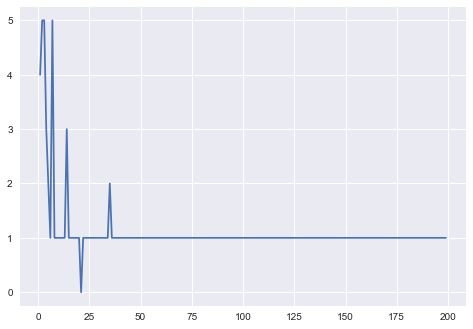

In [32]:
plt.plot(range(1,200),misclassifications)